In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, KFold
import collections
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score,mean_squared_error,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn import tree, metrics
%matplotlib inline

In [2]:
#Read in csv file
file = 'train.csv'
data = pd.read_csv(file)
df = pd.DataFrame(data)
print(df.head(5))

   acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691


In [3]:
#Read in test file
file_test = 'test/seg_00030f.csv'
data_test = pd.read_csv(file)
df_test = pd.DataFrame(data)

Firstly, take a look at the train data structure

In [4]:
df_sample = df.iloc[::440, :]

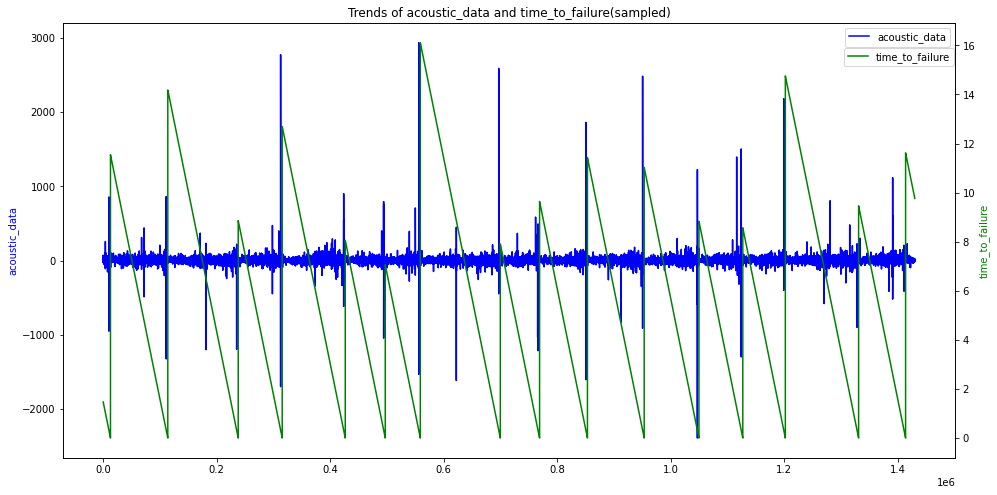

In [3]:
train_acoustic_data_small = df['acoustic_data'].values[::440]
train_time_to_failure_small = df['time_to_failure'].values[::440]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure(sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)


after a glipse of data, we are aware of the data structure:
1. the data is clean, no need of additional data cleaning.
2. the data content is simple, two columns -- 'acoustic data' is dependent variable, 'time to failure' is the target variable.
3. there is a difference between train data and test data structures, the test data are isolated part of earthquake signal, marked by ID, but the training data is continuous signal with several earthquakes.

The first thing to do is to seperate train data to isolated earthquakes in order to get easier analysis of earthquake signal structure.

In [4]:
df['diff'] = round(df['time_to_failure'].diff())
df['diff']= df['diff'].fillna(0)
df['diff']= abs(df['diff'])

In [5]:
df[df['diff']>0]

,acoustic_data,time_to_failure,diff
5656574,4,11.5408,12.0
50085878,1,14.1806,14.0
104677356,4,8.8567,9.0
138772453,-4,12.6940,13.0
187641820,2,8.0555,8.0
218652630,4,7.0590,7.0
245829585,2,16.1074,16.0
307838917,2,7.9056,8.0
338276287,3,9.6371,10.0
375377848,0,11.4264,11.0


In [6]:
earthquake_start = list(df[df['diff']>0].index)
earthquake_end = [x-1 for x in earthquake_start]
earthquake_start.insert(0, 0)
earthquake_end.append(df.iloc[-1,:].name)

In [7]:
print(earthquake_start)
print(earthquake_end)

[0, 5656574, 50085878, 104677356, 138772453, 187641820, 218652630, 245829585, 307838917, 338276287, 375377848, 419368880, 461811623, 495800225, 528777115, 585568144, 621985673]
[5656573, 50085877, 104677355, 138772452, 187641819, 218652629, 245829584, 307838916, 338276286, 375377847, 419368879, 461811622, 495800224, 528777114, 585568143, 621985672, 629145479]


In [8]:
df['id']=0

In [11]:
df.iloc[0:5656573,-1]=1

In [10]:
df.iloc[5656574:50085877,-1]=2

In [12]:
df.iloc[50085878:104677355,-1]=3

In [14]:
df.iloc[104677356:138772452,-1]=4

In [15]:
df.iloc[138772453:187641819,-1]=5

In [16]:
df.iloc[187641820:218652629,-1]=6

In [17]:
df.iloc[218652630:245829584,-1]=7

In [18]:
df.iloc[245829585:307838916,-1]=8

In [19]:
df.iloc[307838917:338276286,-1]=9

In [13]:
df.iloc[earthquake_start[9]:earthquake_end[9],-1]=10

In [20]:
df.iloc[earthquake_start[10]:earthquake_end[10],-1]=11

In [21]:
df.iloc[earthquake_start[11]:earthquake_end[11],-1]=12

In [22]:
df.iloc[earthquake_start[12]:earthquake_end[12],-1]=13

In [23]:
df.iloc[earthquake_start[13]:earthquake_end[13],-1]=14

In [24]:
df.iloc[earthquake_start[14]:earthquake_end[14],-1]=15

In [25]:
df.iloc[earthquake_start[15]:earthquake_end[15],-1]=16

In [26]:
df_eq1 = df[df[id]==1]
df_eq1.to_csv('/Users/Sue/Documents/2020_study/springboard/capstone3/LANL-Earthquake-Prediction/train_eq1.csv',index = False)

KeyError: 140467186820048

In [ ]:
df_eq2 = df[df[id]==2]
df_eq2.to_csv('/Users/Sue/Documents/2020_study/springboard/capstone3/LANL-Earthquake-Prediction/train_eq2.csv',index = False)

In [27]:
p=d

NameError: name 'd' is not defined

In [ ]:
"D ''"

In [28]:
ll,
]\
jk 
\kjh{}

SyntaxError: invalid syntax (<ipython-input-28-74f844794dad>, line 2)

In [29]:
}""}k                     /unmu5uhnuu
X

SyntaxError: invalid syntax (<ipython-input-29-f4d5406202ac>, line 1)

In [ ]:
\]